# Anthony Botello
## Lab 6, PHYS 434 AD

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import h5py

import scipy
from scipy import stats
from scipy.signal import fftconvolve as convolve

import pickle as pkl

# Problem 1

Below are histograms of our Poisson-distributed background with $\lambda = 100$. (Note: I'm not sure what the x-axis is supposed to be in this case.)

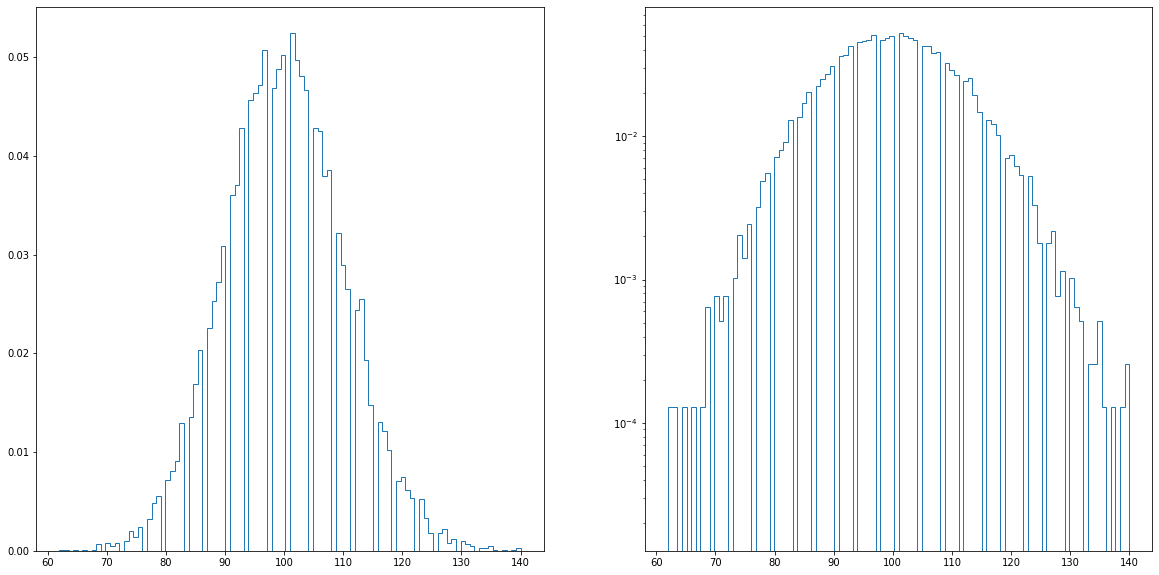

In [3]:
poisson = stats.poisson(100)
bg = poisson.rvs(size=10000)

fig,ax = plt.subplots(1,2,figsize=(20,10))

ax[0].hist(bg,bins=100,histtype='step',density=True)

ax[1].hist(bg,bins=100,histtype='step',density=True,log=True)
plt.show()

In [4]:
print(f'5-sigma threshold = {poisson.isf(stats.norm.sf(5))}')

5-sigma threshold = 154.0


5$\sigma$ threshold is calculated by computing survival probability of a $5\sigma$ value on a standard normal distribution and then applying the inverse survival function of our Poisson background to that value. In this case, the $5\sigma$ threshold of our background is 154.

# Problem 2

## a)

Below we have generated a random signal value within the range of 8-30$\sigma$ and injected it into our background 500 times.

In [5]:
signal = np.zeros(10000)
sim_sigma = np.random.random()* 22 + 8
sim_signal = bg.std() * sim_sigma + 100

In [6]:
print(f'Sigma = {sim_sigma}')
print(f'Signal = {sim_signal}')

Sigma = 19.444912663273314
Signal = 296.34903011943504


In [7]:
for i in range(500):
    idx = np.random.randint(0,len(signal))
    signal[idx] = sim_signal

obs_signal = bg + signal

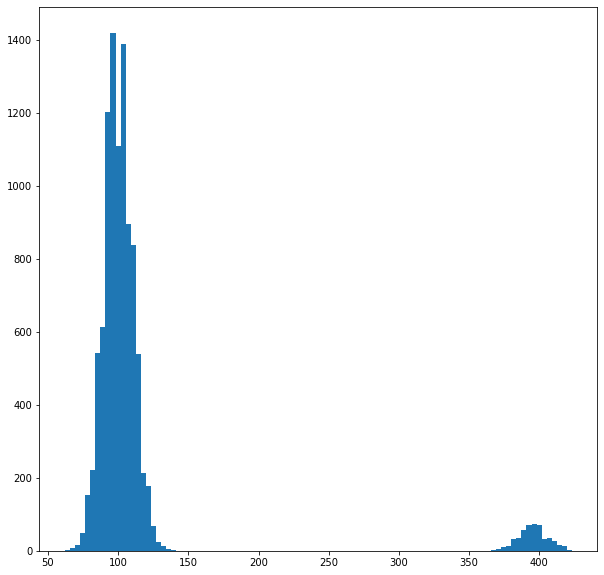

In [8]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(obs_signal,bins=100)
plt.show()

The histogram above shows that there are no instances where our signal is present without any background noise as there are no measurements at exactly the value of our signal. Also, the observed signal distribution on the right of the histogram appears to have a greater variance than the background distribution.

## b)

There appears to be a left bias in the strength of the observed signal.

# 3)

## a)

Below we are simulating injecting a range of signals from 5-30$\sigma$ into our background. The histogram below shows the effect that this has on our observed signal.

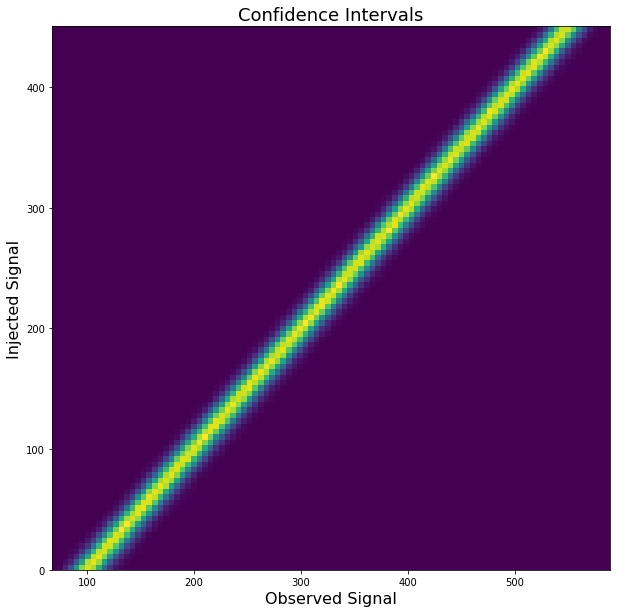

In [13]:
bg = np.random.poisson(100,size=(1000,1000))

signalstrength = np.linspace(0,bg.std() * 35 + 100,1000)
scratch,signal = np.meshgrid(signalstrength,signalstrength)

obs_signal = bg + signal

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist2d(obs_signal.flatten(),signal.flatten(),bins=100)
ax.set_xlabel('Observed Signal',fontsize=16)
ax.set_ylabel('Injected Signal',fontsize=16)
ax.set_title('Confidence Intervals',fontsize=18)
plt.show()

## b)

The histogram below shows that, when injecting the same signal as in problem 2, we get a similar distribution.

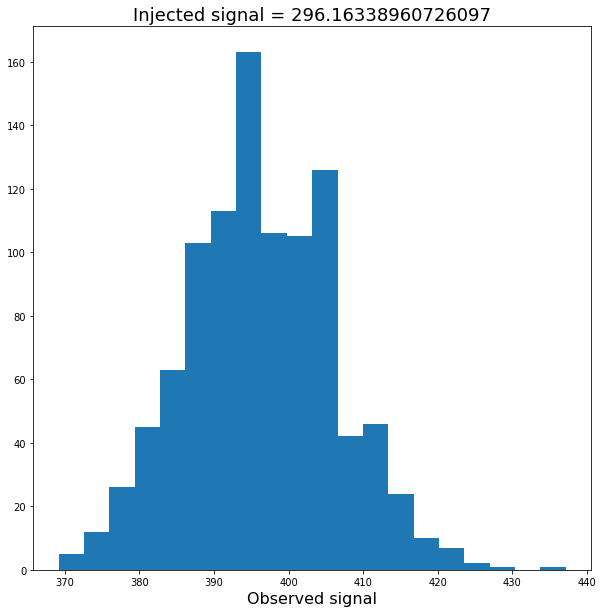

In [14]:
idx = 0
for i in range(len(signal[:,0])):
    if(signal[:,0][i - 1] < sim_signal < signal[:,0][i + 1]):
        idx = i
        break
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(obs_signal[i],bins=20)
ax.set_xlabel('Observed signal',fontsize=16)
ax.set_title(f'Injected signal = {signal[i,0]}',fontsize=18)
plt.show()

## c)

In [15]:
print(f'Chosen signal: {signal[900,0]}')
print(f'Sigma = {stats.norm.isf(poisson.sf(signal[900,0]))}')

Chosen signal: 405.70327343460406
Sigma = 22.91150050756427


In the histogram below of the 22.91$\sigma$ signal, it appears that the distribution is slightly biased to the left -- i.e., toward weaker signals.

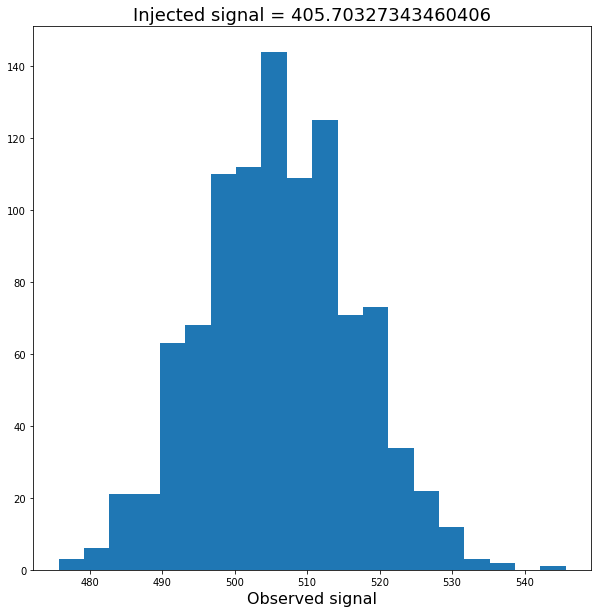

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(obs_signal[900],bins=20)
ax.set_xlabel('Observed signal',fontsize=16)
ax.set_title(f'Injected signal = {signal[900,0]}',fontsize=18)
plt.show()